In [1]:
# coding: utf-8

################################################################################################
# If you test as following, that is, only 1 epoch and 128 batch_size
# your result will around
#     Total Loss on Testing Set :  0.103538942595
#     Accuracy of Testing Set :  0.9631
# 
# If you want to incresing the accuracy, you can ...
#     1. Increasing the number of epochs.
#     2. Decreasing the number of batch_size.
# 
################################################################################################

%matplotlib inline
from __future__ import print_function
from ipywidgets import interact
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer
from keras.layers import LSTM
from keras.optimizers import Adam

# Training parameters.
batch_size = 128
num_classes = 10
epochs = 1

#  rnn size
rnn_hidden = 128

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshapes data RNN.
x_train = x_train.reshape(x_train.shape[0], 28, 28).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28).astype('float32')
x_train = x_train/28
x_test = x_test/28
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Converts class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

row, col = x_train.shape[1:]

model = Sequential()
model.add(InputLayer(input_shape=(row, col)))
model.add(LSTM(128))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Evaluation.
score = model.evaluate(x_test, y_test, verbose=0)
print("Total Loss on Testing Set : ", score[0])
print("Accuracy of Testing Set : ", score[1])



Using Theano backend.


x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 92s - loss: 0.3512 - acc: 0.8906 - val_loss: 0.1175 - val_acc: 0.9631
Total Loss on Testing Set :  0.117473450662
Accuracy of Testing Set :  0.9631


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               80384     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 81,674.0
Trainable params: 81,674.0
Non-trainable params: 0.0
_________________________________________________________________


神經網路判斷為： 0


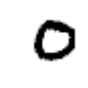

In [3]:
result = model.predict_classes(x_test)
def 辨識(測試編號):
    plt.figure(figsize=(1, 1))
    plt.imshow(x_test[測試編號], cmap="Greys")
    plt.axis('off')
    print("神經網路判斷為：", result[測試編號])

interact(辨識, 測試編號 = (0, len(x_test) - 1));

In [4]:
model_json = model.to_json()
open('mnist_model_architecture_Rnn_LSTM_Sequential.json', 'w').write(model_json)
model.save_weights('mnist_model_architecture_Rnn_LSTM_Sequential.h5')